In [1]:
import numpy as np 
import pandas as pd


In [2]:
df=pd.read_csv("gemstone.csv")

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.shape

(193573, 11)

In [5]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [9]:
df=df.drop(labels="id",axis=1)

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


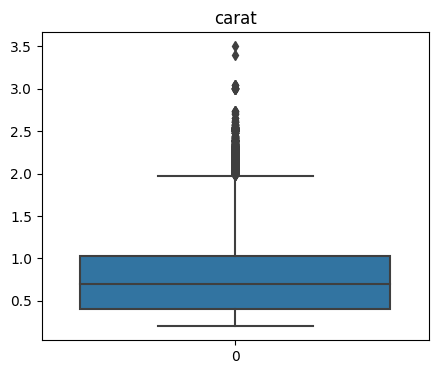

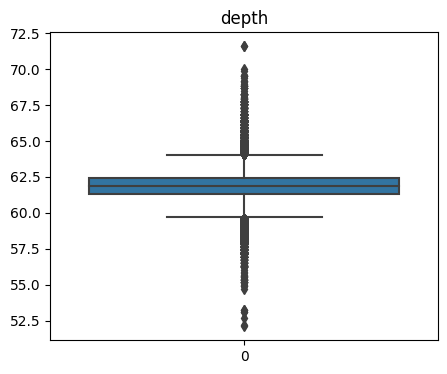

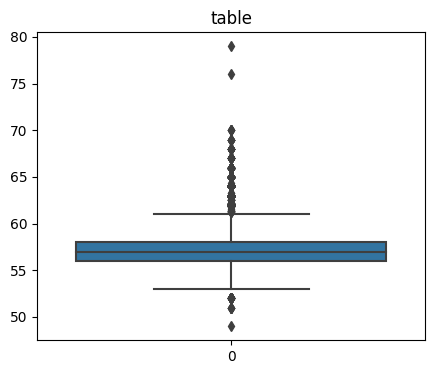

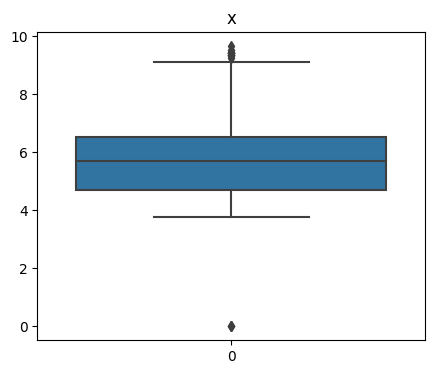

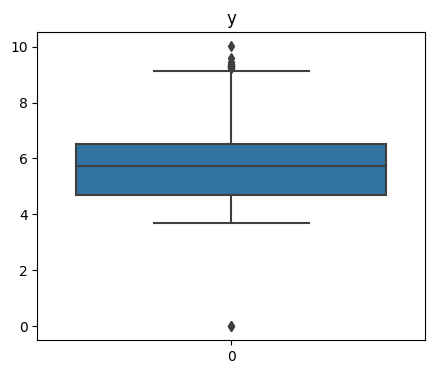

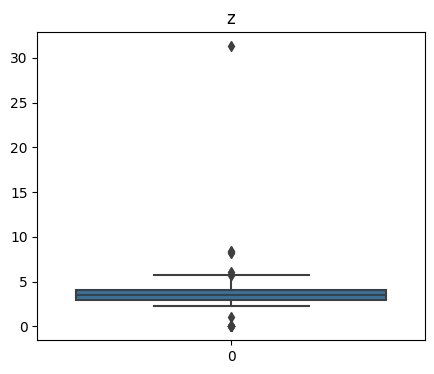

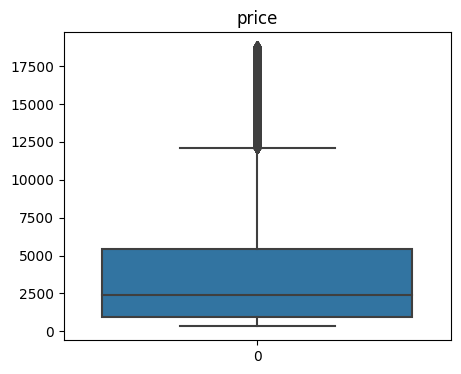

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    if df[i].dtypes!="O":
        plt.figure(figsize=[5,4])
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

In [12]:
def filtered_data(dataset):
    final_data = dataset.copy()  # Create a copy of the original DataFrame
    
    for i in dataset.columns:
        if dataset[i].dtype != "O":  # Check if the column is numeric
            q1 = dataset[i].quantile(0.25)
            q3 = dataset[i].quantile(0.75)
            IQR = q3 - q1
            lower_fence = q1 - (1.5 * IQR)
            higher_fence = q3 + (1.5 * IQR)
            final_data = final_data[(final_data[i] >= lower_fence) & (final_data[i] <= higher_fence)]
    
    return final_data


In [13]:
new_df=filtered_data(df)

In [14]:
new_df

,carat,cut,color,clarity,depth,table,x,y,z,price
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
...,...,...,...,...,...,...,...,...,...,...
193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036


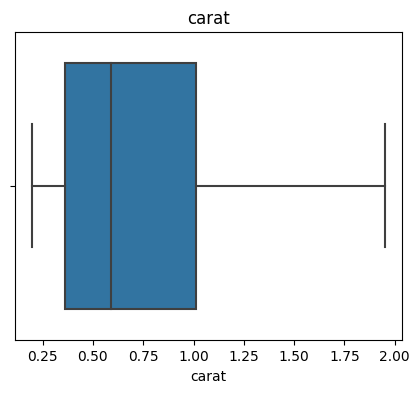

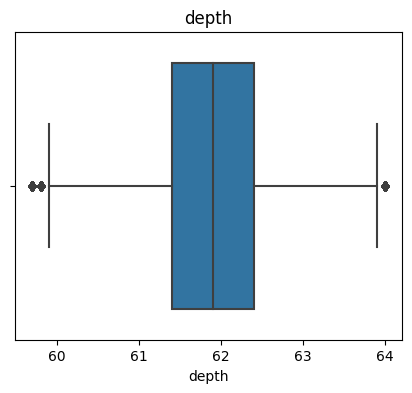

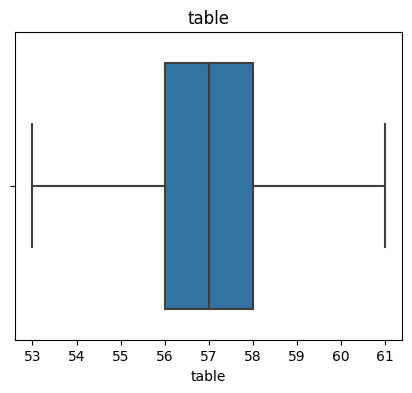

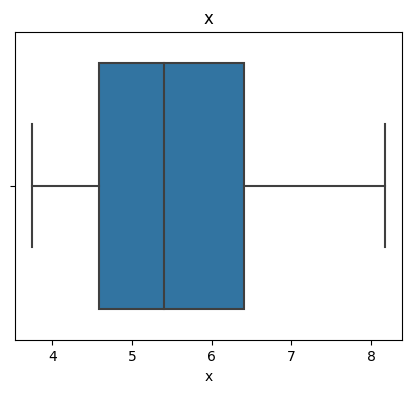

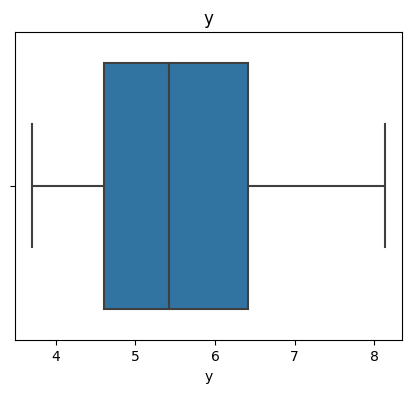

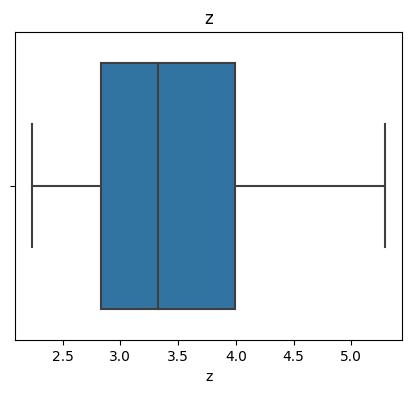

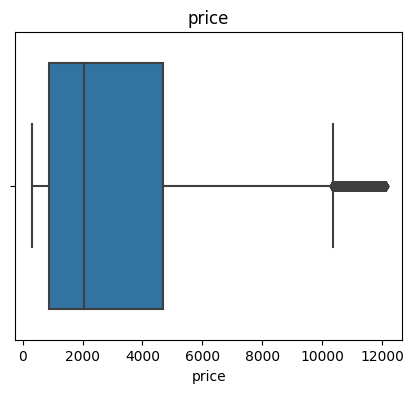

In [15]:
for i in new_df.columns:
    if new_df[i].dtypes!="O":
        plt.figure(figsize=[5,4])
        sns.boxplot(data=new_df,x=new_df[i])
        plt.title(i)
        plt.show()

In [16]:
len(df)-len(new_df)

24818

In [17]:
cat_cols=[cols for cols in df.columns if df[cols].dtypes=="O"]

In [18]:
cat_cols

['cut', 'color', 'clarity']

In [19]:
num_cols=[cols for cols in df.columns if df[cols].dtypes!="O"]

In [20]:
num_cols

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [21]:
X=df.iloc[:,:-1]

In [22]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [23]:
y=df.iloc[:,-1]

In [24]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [25]:
for i in df.columns:
    if df[i].dtypes!="O":
        print(f"correlation of {i} with Price is : \n{df[i].corr(other=y,method='pearson')}")
        print()

correlation of carat with Price is : 
0.9433960991385907

correlation of depth with Price is : 
0.0018795114349712068

correlation of table with Price is : 
0.17491538202811696

correlation of x with Price is : 
0.9010043932827829

correlation of y with Price is : 
0.9010332326010038

correlation of z with Price is : 
0.8930370352349558

correlation of price with Price is : 
0.9999999999999999



In [26]:
for i in new_df.columns:
    if new_df[i].dtypes!="O":
        print(f"correlation of {i} with Price is : \n{new_df[i].corr(other=new_df.iloc[:,-1],method='pearson')}")
        print()

correlation of carat with Price is : 
0.9383991191457696

correlation of depth with Price is : 
0.04687789526063752

correlation of table with Price is : 
0.18474695785629078

correlation of x with Price is : 
0.910849729545968

correlation of y with Price is : 
0.910458466770299

correlation of z with Price is : 
0.9089099715208933

correlation of price with Price is : 
1.0



We can see here after remove outliers correlation bet independent and dependent variable increased lttle bit

In [27]:
for i in df[cat_cols].columns:
    print(f"Unique value for {i} :\n{df[i].unique()}")
    print("-------------------------------------")
    

Unique value for cut :
['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
-------------------------------------
Unique value for color :
['F' 'J' 'G' 'E' 'D' 'H' 'I']
-------------------------------------
Unique value for clarity :
['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']
-------------------------------------


In [28]:
cut_categories=['Fair', 'Premium', 'Good', 'Ideal', 'Very Good']
color_categories=['H', 'G', 'I', 'J', 'F', 'E', 'D']
clarity_categories=['VS2', 'SI2' ,'VS1', 'SI1' ,'IF' ,'VVS2' ,'VVS1', 'I1']

In [29]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [30]:
numeric_columns=X.select_dtypes(exclude="object").columns
category_columns=X.select_dtypes(include="object").columns

In [31]:
cat_pipeline=Pipeline(
    steps=[
        ("simpleimputer",SimpleImputer(strategy="most_frequent")),
        ('OrdinalEncoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
        ]
)

In [32]:
num_pipeline=Pipeline(
    steps=[
        ("SimpleImputer",SimpleImputer()),
        ("StandardScaler",StandardScaler())
    ]
)

In [33]:
peprocessor=ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,numeric_columns),
        ("cat_pipeline",cat_pipeline,category_columns)
    ]
)

In [34]:
# perform train_test splt 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)


In [35]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
150258,1.00,Ideal,F,SI1,61.5,56.0,6.42,6.45,3.96
49222,2.19,Premium,H,SI2,60.1,61.0,8.48,8.40,5.03
6481,1.04,Very Good,H,SI2,63.4,55.0,6.46,6.43,4.09
19558,1.05,Very Good,F,SI2,59.1,60.0,6.62,6.59,3.91
57228,0.40,Ideal,I,VVS2,61.8,56.0,4.77,4.74,2.94
...,...,...,...,...,...,...,...,...,...
56760,0.79,Ideal,E,SI1,61.8,56.0,5.91,5.94,3.67
93176,0.54,Premium,F,VS2,61.2,60.0,5.26,5.23,3.21
30727,2.00,Very Good,H,SI2,63.8,56.0,8.05,7.99,5.08
112859,1.00,Good,G,VS1,62.9,54.0,6.34,6.41,4.00


In [36]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
83327,2.33,Ideal,H,SI2,62.0,56.0,8.56,8.51,5.26
31556,0.62,Ideal,F,SI1,62.0,57.0,5.46,5.49,3.40
40150,1.19,Ideal,H,SI1,61.6,55.0,6.77,6.82,4.19
64647,1.01,Ideal,I,VS2,62.2,57.0,6.36,6.38,3.97
185479,0.31,Ideal,G,IF,62.4,55.0,4.39,4.36,2.73
...,...,...,...,...,...,...,...,...,...
72880,0.56,Premium,E,SI2,62.2,58.0,5.29,5.23,3.27
94310,0.31,Premium,H,SI1,62.8,57.0,4.31,4.29,2.70
186269,0.46,Ideal,E,VS1,60.9,56.0,5.00,5.03,3.06
95685,1.31,Premium,H,SI2,62.7,58.0,6.96,7.00,4.37


In [37]:
y_train.shape

(135501,)

In [38]:
peprocessor.fit_transform(X_train)

array([[ 0.45410567, -0.29654463, -0.63784219, ...,  3.        ,
         4.        ,  3.        ],
       [ 3.02766057, -1.58999042,  1.96548435, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.54061172,  1.45884607, -1.15850749, ...,  4.        ,
         0.        ,  1.        ],
       ...,
       [ 2.61675685,  1.82840201, -0.63784219, ...,  4.        ,
         0.        ,  1.        ],
       [ 0.45410567,  0.99690115, -1.6791728 , ...,  2.        ,
         1.        ,  2.        ],
       [-0.88673805, -1.12804549,  2.48614965, ...,  4.        ,
         5.        ,  5.        ]])

In [39]:
peprocessor.transform(X_test)

array([[ 3.33043173,  0.16540029, -0.63784219, ...,  3.        ,
         0.        ,  1.        ],
       [-0.36770177,  0.16540029, -0.11717688, ...,  3.        ,
         4.        ,  3.        ],
       [ 0.8650094 , -0.20415565, -1.15850749, ...,  3.        ,
         0.        ,  3.        ],
       ...,
       [-0.71372596, -0.85087854, -0.63784219, ...,  3.        ,
         5.        ,  2.        ],
       [ 1.12452754,  0.81212318,  0.40348843, ...,  1.        ,
         0.        ,  1.        ],
       [-0.9732441 , -0.75848956,  0.40348843, ...,  1.        ,
         5.        ,  0.        ]])

In [40]:
X_train=pd.DataFrame(peprocessor.fit_transform(X_train),columns=peprocessor.get_feature_names_out())
X_test=pd.DataFrame(peprocessor.transform(X_test),columns=peprocessor.get_feature_names_out())

In [41]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.454106,-0.296545,-0.637842,0.636818,0.663672,0.622410,3.0,4.0,3.0
1,3.027661,-1.589990,1.965484,2.494366,2.433180,2.182754,1.0,0.0,1.0
2,0.540612,1.458846,-1.158507,0.672887,0.645523,0.811984,4.0,0.0,1.0
3,0.562238,-2.513880,1.444819,0.817163,0.790714,0.549496,4.0,4.0,1.0
4,-0.843485,-0.019378,-0.637842,-0.851023,-0.888051,-0.865022,3.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...
135496,-0.000051,-0.019378,-0.637842,0.176940,0.200877,0.199512,3.0,5.0,3.0
135497,-0.540714,-0.573712,1.444819,-0.409179,-0.443405,-0.471290,1.0,4.0,0.0
135498,2.616757,1.828402,-0.637842,2.106625,2.061130,2.255668,4.0,0.0,1.0
135499,0.454106,0.996901,-1.679173,0.564681,0.627374,0.680740,2.0,1.0,2.0


In [42]:
X_test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,3.330432,0.165400,-0.637842,2.566503,2.532999,2.518156,3.0,0.0,1.0
1,-0.367702,0.165400,-0.117177,-0.228835,-0.207471,-0.194219,3.0,4.0,3.0
2,0.865009,-0.204156,-1.158507,0.952421,0.999425,0.957811,3.0,0.0,3.0
3,0.475732,0.350178,-0.117177,0.582715,0.600151,0.636992,3.0,2.0,0.0
4,-1.038124,0.534956,-1.158507,-1.193677,-1.232878,-1.171258,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...
58067,-0.497461,0.350178,0.403488,-0.382127,-0.443405,-0.383794,1.0,5.0,1.0
58068,-1.038124,0.904512,-0.117177,-1.265815,-1.296399,-1.215006,1.0,0.0,3.0
58069,-0.713726,-0.850879,-0.637842,-0.643627,-0.624893,-0.690030,3.0,5.0,2.0
58070,1.124528,0.812123,0.403488,1.123748,1.162764,1.220299,1.0,0.0,1.0


In [43]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [44]:
# model evaluation
def model_evaluation(actual,pred):
    R2_score=r2_score(actual,pred)
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    rmse=np.sqrt(mse)
    return R2_score,mae,mse,rmse

In [45]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [46]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [47]:
models

{'LinearRegression': LinearRegression(),
 'Lasso': Lasso(),
 'Ridge': Ridge(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'RandomForestRegressor': RandomForestRegressor()}

In [48]:
R2Score=[]
model_list=[]

In [49]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_pred=model.predict(X_test)
    
    R2_score,mae,mse,rmse=model_evaluation(y_test,y_pred)
    
    print(f"<<<{list(models.keys())[i]}>>>")
    
    model_list.append(list(models.keys())[i])
    R2Score.append(R2_score)
    
    print("ModelTraining performance :")
    print("\nR2_score :",R2_score*100)
    print("\nmse :",mse)
    print("\nmae :",mae)
    print("\nRmse :",rmse)
    
    print(50*("~"))

<<<LinearRegression>>>
ModelTraining performance :

R2_score : 91.06135628874135

mse : 1452832.1071871947

mae : 727.1796265521964

Rmse : 1205.334852722344
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<<<Lasso>>>
ModelTraining performance :

R2_score : 91.06935031472413

mse : 1451532.8074289053

mae : 728.5286259640475

Rmse : 1204.7957534075663
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<<<Ridge>>>
ModelTraining performance :

R2_score : 91.06134271439667

mse : 1452834.313477591

mae : 727.2039522163208

Rmse : 1205.3357679408634
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<<<DecisionTreeRegressor>>>
ModelTraining performance :

R2_score : 95.68170622136043

mse : 701868.8799478807

mae : 426.2175345548055

Rmse : 837.7761514556742
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<<<RandomForestRegressor>>>
ModelTraining performance :

R2_score : 97.6645941566211

mse : 379582.48501390143

mae : 315.5861490903739

Rmse : 616.1026578533008
~~~~~~~~~~~~~~~~~~~

In [50]:
model_list

['LinearRegression',
 'Lasso',
 'Ridge',
 'DecisionTreeRegressor',
 'RandomForestRegressor']

In [51]:
R2Score

[0.9106135628874135,
 0.9106935031472413,
 0.9106134271439668,
 0.9568170622136043,
 0.9766459415662111]

In [53]:
best_scroe=max(R2Score)
best_scroe

0.9766459415662111

In [58]:
trained_model={model_list[i]:R2Score[i] for i in range(len(model_list))}

In [59]:
trained_model

{'LinearRegression': 0.9106135628874135,
 'Lasso': 0.9106935031472413,
 'Ridge': 0.9106134271439668,
 'DecisionTreeRegressor': 0.9568170622136043,
 'RandomForestRegressor': 0.9766459415662111}

In [62]:
best_model_name=list(trained_model.keys())[list(trained_model.values()).index(best_scroe)]

In [63]:
best_model_name

'RandomForestRegressor'

In [66]:
best_model=list(models.values())[list(models.keys()).index(best_model_name)]

In [67]:
best_model

RandomForestRegressor()

In [69]:
best_model.fit(X_train,y_train)

RandomForestRegressor()

In [70]:
import pickle

with open("model.pkl",'wb') as file:
    pickle.dump(best_model,file)

RandomForestRegressor()